# HW06: ML and Causal Inference (due November 9th)

## Exercise 1: Double Machine learning with Lasso

In this exercise you will investigate a research question similar to the one in HW02. Namely, what is the effect of being in a Union on wages? You will use the same data as in HW02 (description of the variables can be found [here](https://rdrr.io/rforge/sampleSelection/man/nlswork.html)). Although, here instead of just including controls, you will estimate the effect of union membership on wages using double Lasso.

The regression of reference is the following: 

$$ln\_wage_i = \beta_0 + \beta_1 union_i +\varepsilon_i$$

In [1]:
# faced problems with econml
import econml
print(econml.__version__)

0.14.1


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
# Load Data (NLSY)
df = pd.read_stata('http://www.stata-press.com/data/r16/nlswork.dta')
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
1,1,77,51,25.0,black,0.0,0.0,12.0,0,0.0,...,0.0,12.0,8.0,0.0,0.0,3.775641,1.500000,32.0,52.0,1.778681
2,1,80,51,28.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,5.294872,1.833333,45.0,75.0,2.551715
3,1,85,51,33.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,7.160256,1.916667,42.0,97.0,2.614172
4,1,87,51,35.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,8.987180,3.916667,45.0,95.0,2.536374


In [5]:
Y = df['ln_wage']
D = df['union']

In [6]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col


## TODO: run the regression written above
olsf = smf.ols("ln_wage ~ union", df).fit(cov_type='hc1')
print(summary_col(olsf))


               ln_wage 
-----------------------
Intercept      1.6564  
               (0.0045)
union          0.2502  
               (0.0089)
R-squared      0.0523  
R-squared Adj. 0.0522  
Standard errors in
parentheses.


In [7]:
olsf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     796.3
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          3.05e-170
Time:                        15:48:21   Log-Likelihood:                -8266.7
No. Observations:               13452   AIC:                         1.654e+04
Df Residuals:                   13450   BIC:                         1.655e+04
Df Model:                           1                                         
Covariance Type:                  hc1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6564      0.004    371.842      0.000       1.648       1.665
union          0.2502      0.009     28.218      0.000       0.233       0.268
==============================================================================
Omnibus:                      425.572   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.660
Skew:                           0.205   Prob(JB):                    3.24e-195
Kurtosis:                       4.196   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

**What could be potential sources of bias (i.e. confounders)?**

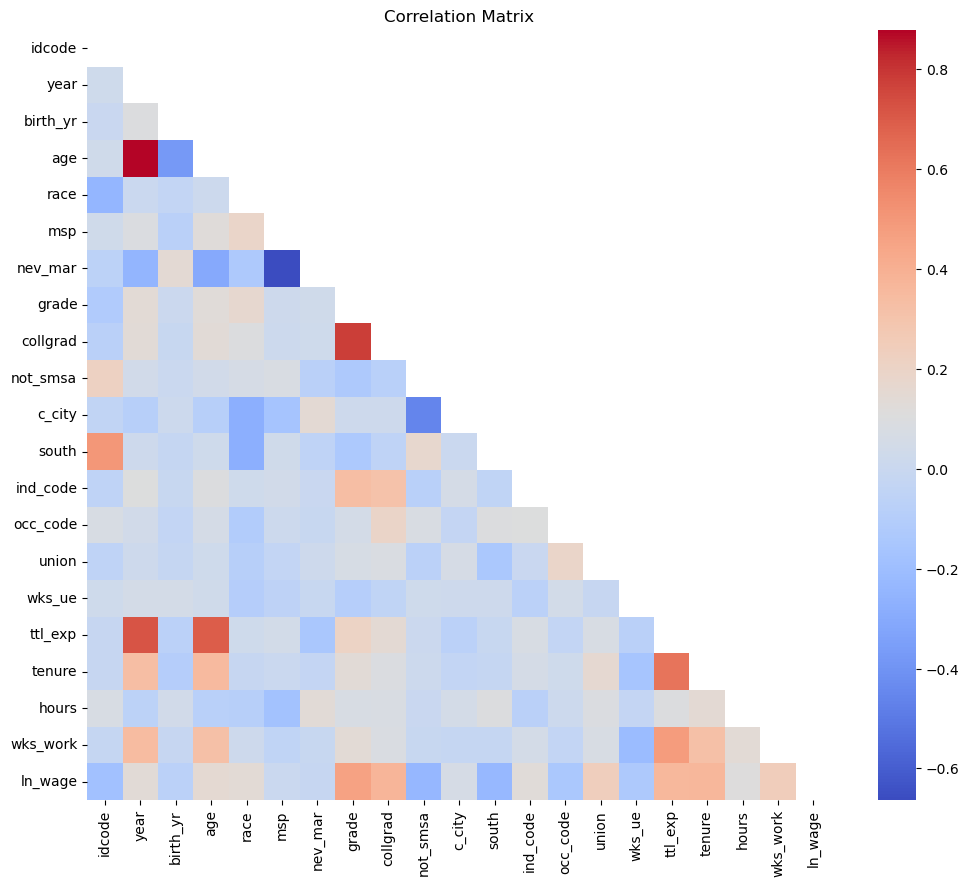

In [8]:
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

encoder = OrdinalEncoder()
df_test = df
df_test_columns = df_test.columns
df_test = encoder.fit_transform(df_test)
df_test = df_test.astype('float32')
df_test = pd.DataFrame(df_test, columns=df_test_columns)


# first plot the correlation plot
correlation_matrix = df_test.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask = mask)
plt.title("Correlation Matrix")
plt.show()

- age highly correlated with birth year
- age highly correlated with year
- nev married highly correlated with msp
- year highly correlated with ttl_exp
- age highly correlated with ttl_exp
- tenure highly correlated with ttl_exp
- coll_grad highly correlated with grade
- wage slightly correlated with grade, collgrad, ttl_exp, tenure

Education (grade, collgrad): Education can be related to both union membership and wages. Union members might have different levels of education compared to non-union members, and education itself can impact wages.

Experience (ttl_exp): Work experience or total work experience (ttl_exp) can affect both union membership decisions and wages. Individuals with more experience may have higher wages and may be more likely to join a union.

Occupation (occ_code): The specific occupation of a worker (occ_code) can be associated with both union membership and wage levels. Some occupations might have a higher unionization rate, and the type of work can influence wages.

Industry (ind_code): The industry in which a person is employed (ind_code) can be related to both union membership and wages. Different industries may have varying levels of union representation and wage structures.

Location (not_smsa, c_city, south): Geographic location variables, such as whether the job is in a central city (c_city), within the South (south), or in a Standard Metropolitan Statistical Area (not_smsa), can affect both union membership rates and wage levels.

Age (age): Age can influence the likelihood of joining a union and can also be related to wages. Older workers may have different union membership rates and wage levels compared to younger workers.

Marital Status (msp): Marital status can impact both union membership and wages. For example, married individuals might be more or less likely to join a union, and marital status can be correlated with income.

Race (race): Race or ethnicity can be associated with both union membership and wages. Different racial or ethnic groups may have different unionization rates and wage disparities.

In [9]:
# fill in X with all predictors that are not colliders
bias_sources = ['age', 'race', 'msp', 'grade', 'collgrad', 'not_smsa', 
                'c_city', 'south', 'ind_code', 'occ_code',
                'wks_ue', 'ttl_exp', 'hours']

cont_variables = ['age','grade','wks_ue','ttl_exp','hours']
cat_variables = [var for var in bias_sources if var not in cont_variables]

X_cat = df[cat_variables]
X_cont = df[cont_variables]


In [10]:
#encode categorical variables
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

X_cat_columns = X_cat.columns
X_cat = encoder.fit_transform(X_cat)
X_cat = X_cat.astype('float32')
X_cat = pd.DataFrame(X_cat, columns=X_cat_columns)

In [11]:
# TODO: standardize all continuous variable in X to variance one
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_cont_standardized = scaler.fit_transform(X_cont)

# Create a DataFrame for the standardized continuous variables
X_cont_standardized_df = pd.DataFrame(X_cont_standardized, columns=X_cont.columns)

# Concatenate the standardized continuous variables with the categorical variables
X = pd.concat([X_cont_standardized_df, X_cat], axis=1)

In [12]:
# join all Xs
X = pd.merge(X_cat, X_cont, left_index=True, right_index=True)

classeconml.dml.LinearDML
(*, 
- model_y='auto', 
- model_t='auto', 
- featurizer=None, 
- treatment_featurizer=None, 
- fit_cate_intercept=True, 
- linear_first_stages=True, 
- discrete_treatment=False, 
- categories='auto', 
- cv=2, 
- mc_iters=None, 
- mc_agg='mean', 
- random_state=None)

In [13]:
#testing for duplicates and NA values
Y = df['ln_wage']
D = df['union']
x_large = pd.concat([X,Y,D], axis = 1)

print(X.shape)
print(Y.shape)
print(D.shape)

(13452, 13)
(13452,)
(13452,)


In [14]:
from econml.dml import DML, LinearDML
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from econml.sklearn_extensions.linear_model import StatsModelsLinearRegression

# TODO: generate train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, D_train, D_test, y_train, y_test = train_test_split(X, D, Y, test_size=0.2)


# TODO: define DML model with double LASSO
# Split the data into training and test sets
X_a, X_b, D_a, D_b, y_a, y_b = train_test_split(X, D, Y, test_size=0.5)


# Define the number of cross-validation folds
cv = 3

# Create the LinearDML model
est_local = LinearDML(model_y=RandomForestRegressor(n_estimators=100, max_depth =30, random_state=42),      # learn Y_hat using the controls
                model_t=RandomForestClassifier(n_estimators=100, max_depth =30, random_state=42),     # learn D_hat using the controls
                discrete_treatment=True,
                linear_first_stages=False,
                cv=6)

# Fit the model on the training data
est_local.fit(y_train, D_train, X=None, W=X_train)
# LinearDML: https://econml.azurewebsites.net/_autosummary/econml.dml.LinearDML.html


c:\Users\rohit\miniconda3\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\rohit\miniconda3\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=1

In [15]:
# TODO: display a summary
print(est_local.summary())

Coefficient Results:  X is None, please call intercept_inference to learn the constant!
                       CATE Intercept Results                       
               point_estimate stderr zstat  pvalue ci_lower ci_upper
--------------------------------------------------------------------
cate_intercept          0.131  0.009 14.724    0.0    0.113    0.148
--------------------------------------------------------------------

<sub>A linear parametric conditional average treatment effect (CATE) model was fitted:
$Y = \Theta(X)\cdot T + g(X, W) + \epsilon$
where for every outcome $i$ and treatment $j$ the CATE $\Theta_{ij}(X)$ has the form:
$\Theta_{ij}(X) = X' coef_{ij} + cate\_intercept_{ij}$
Coefficient Results table portrays the $coef_{ij}$ parameter vector for each outcome $i$ and treatment $j$. Intercept Results table portrays the $cate\_intercept_{ij}$ parameter.</sub>


In [16]:
olsf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     796.3
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          3.05e-170
Time:                        15:49:46   Log-Likelihood:                -8266.7
No. Observations:               13452   AIC:                         1.654e+04
Df Residuals:                   13450   BIC:                         1.655e+04
Df Model:                           1                                         
Covariance Type:                  hc1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6564      0.004    371.842      0.000       1.648       1.665
union          0.2502      0.009     28.218      0.000       0.233       0.268
==============================================================================
Omnibus:                      425.572   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.660
Skew:                           0.205   Prob(JB):                    3.24e-195
Kurtosis:                       4.196   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

**Compare the estimates form this and the previous regression. How do these change?**
We see a smaller beta values for union when controlling for confounders. 0.131 instead of 0.242. 

**Interpret the coefficient from the double ml approach. Can it be interpreted as causal?**

Given the p-value and low standard error, the interpretation can be considered causal.


## Exercise 2: Heterogenous Treatment Effects with double Lasso

This exercise will be a simple extension of exercise 1. We just want to estimate a CausalForestDML model where we can analyze heterogeneous treatment effects.

In [18]:
# CausalForestDML: https://econml.azurewebsites.net/_autosummary/econml.dml.CausalForestDML.html
from econml.dml import CausalForestDML

est2 = CausalForestDML(model_y=RandomForestRegressor(),
                       model_t=RandomForestClassifier(),
                       discrete_treatment=True,
                       n_estimators=100,
                       max_depth=30,
                       verbose=1,
                       cv=6)

# TODO: tune the model
est2.tune(y_train, D_train, X=X_train, W=None)
# TODO: fit the model
est2.fit(y_train, D_train, X=X_train, W=None)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parall

In [25]:
# TODO: display summary
est2.summary()

Population summary results are available only if `cache_values=True` at fit time!


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATE,0.093,0.022,4.277,0.0,0.051,0.136
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATT,0.138,0.007,20.765,0.0,0.125,0.151
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATT,-0.058,0.093,-0.628,0.53,-0.24,0.124


In [22]:
est2.ate__inference().summary_frame()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
X,,,,,,
ATE,0.093,0.022,4.277,0.0,0.051,0.136


In [20]:
# manually calculate the heterogeneous effect for each observation
individual_treatment_effects = est2.effect(X_train)
# Print the individual treatment effects
print("Individual Treatment Effects:")
print(individual_treatment_effects)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Individual Treatment Effects:
[ 0.15040398  0.07373656  0.1852413  ...  0.05332044  0.19885397
 -0.00265119]


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [23]:
te_pred2 = est2.effect(X_test)
lb2, ub2 = est2.effect_interval(X_test, alpha=0.01)

# get estimate heterogeneous effects with confidence intervals for all observations
df_he = est2.effect_inference(X_test).summary_frame(alpha=0.1, value=0, decimals=3)
#sort df by point estimate
df_he = df_he.sort_values(by='point_estimate', ascending=False)
df_he

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.2s finished


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
X,,,,,,
2058,0.507,0.258,1.965,0.049,0.083,0.931
949,0.494,0.404,1.223,0.221,-0.170,1.158
729,0.489,0.326,1.502,0.133,-0.047,1.024
2302,0.471,0.195,2.424,0.015,0.152,0.791
44,0.463,0.210,2.209,0.027,0.118,0.809
...,...,...,...,...,...,...
233,-0.084,0.080,-1.043,0.297,-0.216,0.048
333,-0.092,0.081,-1.140,0.254,-0.226,0.041
2181,-0.105,0.090,-1.163,0.245,-0.254,0.044


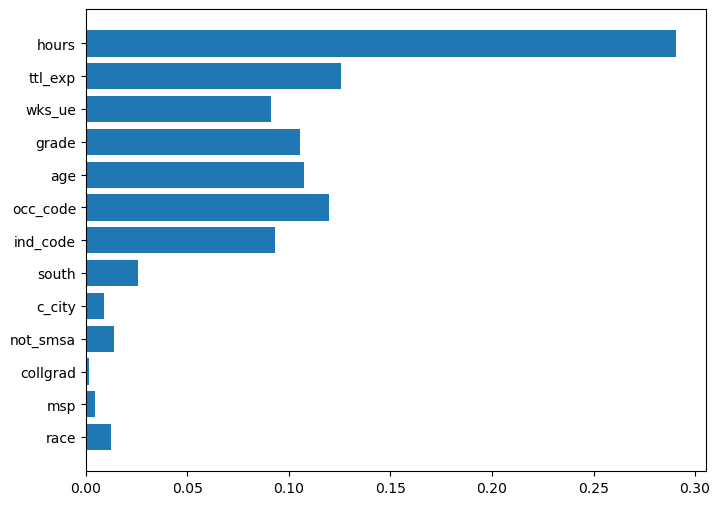

In [26]:
# TODO: visualize the feature importance
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.barh(est2.cate_feature_names(), est2.feature_importances_)
plt.show()